# Dirichlet distribution
- https://en.wikipedia.org/wiki/Dirichlet_distribution

$$
\text{Dir}\left(\boldsymbol{\alpha}\right)\rightarrow \mathrm{p}\left(\boldsymbol{\theta}\mid\boldsymbol{\alpha}\right)=\frac{\Gamma\left(\sum_{i=1}^{k}\boldsymbol{\alpha}_{i}\right)}{\prod_{i=1}^{k}\Gamma\left(\boldsymbol{\alpha}_{i}\right)}\prod_{i=1}^{k}\boldsymbol{\theta}_{i}^{\boldsymbol{\alpha}_{i}-1} \\
K\geq2\ \text{number of categories} \\
{\alpha _{1},\ldots ,\alpha _{K}}\ concentration\ parameters,\ where\ {\alpha_{i}>0}
$$

## Visulaizing Dirchlet Distributions
- http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

In [14]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce
# import seaborn
from math import gamma
from operator import mul

In [31]:
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]])
print(corners)
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

[[ 0.         0.       ]
 [ 1.         0.       ]
 [ 0.5        0.8660254]]


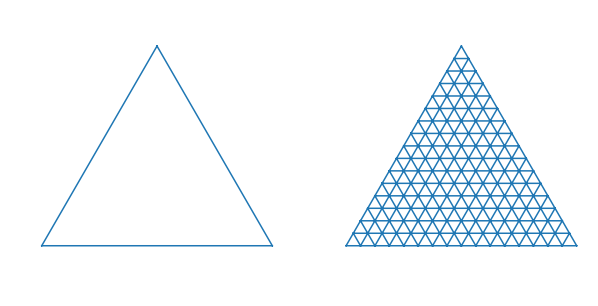

In [32]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(10, 5))
for (i, shape) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(shape)
    plt.axis('off')
    plt.axis('equal')

In [45]:
# Mid-points of triangle sides opposite of each corner
midpoints = []
for i in range(3):
    point1 = corners[(i + 1) % 3]
    point2 = corners[(i + 2) % 3]
    mid = (point1 + point2) / 2.0
    print(point1, '+', point2, '=', mid)
    midpoints.append(mid)
    
print('\n')
print(midpoints)    

[ 1.  0.] + [ 0.5        0.8660254] = [ 0.75       0.4330127]
[ 0.5        0.8660254] + [ 0.  0.] = [ 0.25       0.4330127]
[ 0.  0.] + [ 1.  0.] = [ 0.5  0. ]


[array([ 0.75     ,  0.4330127]), array([ 0.25     ,  0.4330127]), array([ 0.5,  0. ])]


## Setting up the Code

Before we can plot our Dirichlet distributions, we need to do three things:

- Generate a set of x-y coordinates over our equilateral triangle
- Map the x-y coordinates to the 2-simplex coordinate space
- Compute Dir(α)Dir(α) for each point

In [34]:
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

Gamma: $\Gamma \left( z \right) = \int\limits_0^\infty {x^{z - 1} e^{ - x} dx}$

$
\text{Dir}\left(\boldsymbol{\alpha}\right)\rightarrow \mathrm{p}\left(\boldsymbol{\theta}\mid\boldsymbol{\alpha}\right)=\frac{\Gamma\left(\sum_{i=1}^{k}\boldsymbol{\alpha}_{i}\right)}{\prod_{i=1}^{k}\Gamma\left(\boldsymbol{\alpha}_{i}\right)}\prod_{i=1}^{k}\boldsymbol{\theta}_{i}^{\boldsymbol{\alpha}_{i}-1} \\
K\geq2\ \text{number of categories} \\
{\alpha _{1},\ldots ,\alpha _{K}}\ concentration\ parameters,\ where\ {\alpha_{i}>0}
$

In [35]:
class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])


In [36]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

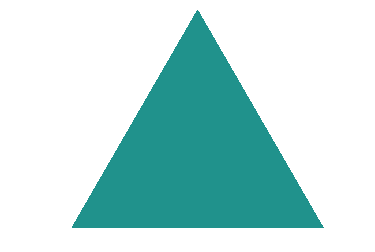

In [37]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

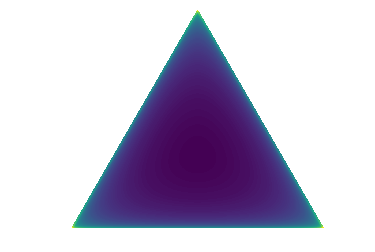

In [38]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

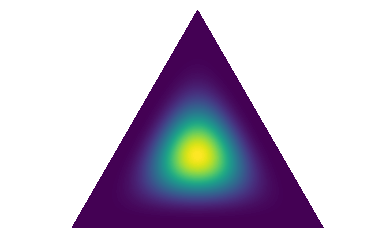

In [39]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

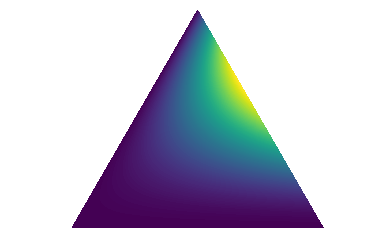

In [48]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

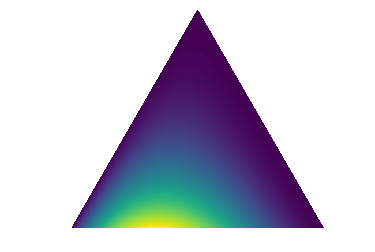

In [49]:
draw_pdf_contours(Dirichlet([3, 2, 1]))

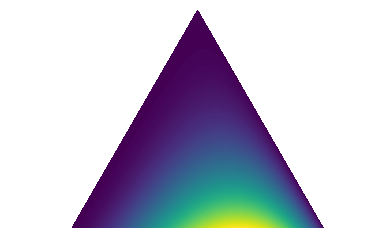

In [50]:
draw_pdf_contours(Dirichlet([2, 3, 1]))